# Merge `drug price data` with `patent_data`

In [60]:
# import module
import numpy as np
import pandas as pd

In [61]:
# read patent data with drugs that expired in 2019
patent_2019 = pd.read_excel('patent_expired_2019.xlsx')
patent_2019.head(3)

,INGREDIENT_STRING,DOSAGE_FORM,ROUTE,TRADE_NAME,APPL_TYPE,APPL_NO,PRODUCT_NO,PATENT_NO,EXPIRE_DATE,PE_EXTENSION_FLAG,PE_EXTENSION_DATE,DRUG_SUBSTANCE_FLAG,DRUG_PRODUCT_FLAG,USE_CODE,DELIST_FLAG,SUBMISSION_DATE
0,MINOXIDIL,TABLET,ORAL,LONITEN,N,18154,1,3461461,1985-05-07,N,05/07/1985,N,N,NaN,N,NaN
1,MINOXIDIL,TABLET,ORAL,LONITEN,N,18154,3,3461461,1985-05-07,N,05/07/1985,N,N,NaN,N,NaN
2,RITODRINE HYDROCHLORIDE,INJECTABLE,INJECTION,YUTOPAR,N,18580,1,3410944,1985-11-12,N,11/12/1985,N,N,NaN,N,NaN


In [62]:
# get a list of unique patent names
unique_names  = patent_2019.TRADE_NAME.unique()

In [63]:
# read drug price data
df = pd.read_csv('drug_data.csv')
df.head(3)

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2017,Tot_Dsg_Unts_2017,Tot_Clms_2017,Tot_Benes_2017,Avg_Spnd_Per_Dsg_Unt_Wghtd_2017,Avg_Spnd_Per_Clm_2017,...,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Tot_Clms_2021,Tot_Benes_2021,Avg_Spnd_Per_Dsg_Unt_Wghtd_2021,Avg_Spnd_Per_Clm_2021,Avg_Spnd_Per_Bene_2021,Outlier_Flag_2021,Chg_Avg_Spnd_Per_Dsg_Unt_20_21,CAGR_Avg_Spnd_Per_Dsg_Unt_17_21
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,217938.04,1014318.0,8595.0,3025.0,0.216105,25.356375,...,102280.76,459384.0,3708,1313.0,0.223001,27.583808,77.898522,0,0.024346,0.007885
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,217938.04,1014318.0,8595.0,3025.0,0.216105,25.356375,...,102280.76,459384.0,3708,1313.0,0.223001,27.583808,77.898522,0,0.024346,0.007885
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,402124.68,1850703.0,15403.0,5967.0,0.217359,26.106906,...,131927.33,566872.0,4564,1766.0,0.232812,28.906076,74.704037,0,0.159124,0.017317


In [64]:
# turn both generic name in the price data and the unique patent name all into upper class for merging
df1 = df.copy()
unique_names = [i.upper() for i in unique_names] # unique patent expired in 2019
df1["Brnd_Name"] = df1["Brnd_Name"].str.upper()


In [65]:
# merge on 'Brnd Name' and 'Trade Name'
merge_name = []
for name in df1["Brnd_Name"]:
    for unique_patent in unique_names:
        if (name in unique_patent) or (unique_patent in name):
            merge_name.append(name)
            break
        else:
            pass


In [37]:
merge_name = set(merge_name)
merge_df = df1[df1['Brnd_Name'].isin(merge_name)]
merge_df

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2017,Tot_Dsg_Unts_2017,Tot_Clms_2017,Tot_Benes_2017,Avg_Spnd_Per_Dsg_Unt_Wghtd_2017,Avg_Spnd_Per_Clm_2017,...,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Tot_Clms_2021,Tot_Benes_2021,Avg_Spnd_Per_Dsg_Unt_Wghtd_2021,Avg_Spnd_Per_Clm_2021,Avg_Spnd_Per_Bene_2021,Outlier_Flag_2021,Chg_Avg_Spnd_Per_Dsg_Unt_20_21,CAGR_Avg_Spnd_Per_Dsg_Unt_17_21
20,ABELCET,Amphotericin B Lipid Complex,1,Overall,6.756950e+05,68490.000,420.0,137.0,9.865601,1608.797691,...,5.045453e+05,97200.00,697,199.0,5.190796,723.881392,2535.403668,0,0.011610,-0.148318
21,ABELCET,Amphotericin B Lipid Complex,1,Leadiant Biosci,6.756950e+05,68490.000,420.0,137.0,9.865601,1608.797691,...,5.045453e+05,97200.00,697,199.0,5.190796,723.881392,2535.403668,0,0.011610,-0.148318
22,ABILIFY,Aripiprazole,1,Overall,3.775740e+07,1158482.500,32241.0,6955.0,32.723650,1171.099019,...,2.048485e+07,633899.00,15261,2174.0,32.656164,1342.300713,9422.654637,0,-0.051700,-0.000516
23,ABILIFY,Aripiprazole,1,Otsuka America,3.775740e+07,1158482.500,32241.0,6955.0,32.723650,1171.099019,...,2.048485e+07,633899.00,15261,2174.0,32.656164,1342.300713,9422.654637,0,-0.051700,-0.000516
24,ABILIFY MAINTENA,Aripiprazole,1,Overall,2.618508e+08,138042.611,137385.0,19543.0,1896.963569,1905.963555,...,4.994291e+08,210840.18,208784,26393.0,2368.508428,2392.085174,18922.786757,0,0.050991,0.057071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13746,ZYVOX,Linezolid,1,Overall,1.479765e+06,15702.000,393.0,330.0,161.816476,3765.304707,...,6.959061e+04,1255.00,43,34.0,55.450685,1618.386279,2046.782647,1,-0.650784,-0.234895
13747,ZYVOX,Linezolid,1,Pharmaci/Pfizer,1.479765e+06,15702.000,393.0,330.0,161.816476,3765.304707,...,6.959061e+04,1255.00,43,34.0,55.450685,1618.386279,2046.782647,1,-0.650784,-0.234895
13748,ZYVOX,Linezolid In Dextrose 5%,2,Overall,3.076534e+05,1158228.000,401.0,164.0,0.271663,767.215536,...,4.877609e+04,298817.00,159,56.0,0.163115,306.767862,871.001607,0,-0.004769,-0.119729
13749,ZYVOX,Linezolid In Dextrose 5%,1,Pharmaci/Pfizer,2.325290e+05,867822.000,313.0,126.0,0.275311,742.904089,...,3.924177e+04,239417.00,122,48.0,0.163906,321.653852,817.536875,0,0.001126,-0.121599


In [71]:
# drop drug with multiple manufactuere, i.e. drug with "Mftr == Overall && "Tot_Mftr >= 2""
drop_names = merge_df[(merge_df.Mftr_Name == 'Overall') & (merge_df.Tot_Mftr >=2)].Brnd_Name.unique()
merge_df = merge_df[merge_df.Brnd_Name.isin(drop_names) == False]


In [73]:
# drop 'Mftr_Name' == "Overall" since it's an average of all that generic drug
merge_df2 = merge_df[merge_df.Mftr_Name != 'Overall']


In [74]:
# check how many unic drug
merge_df2.Brnd_Name.unique().shape

(1035,)

In [75]:
# check for number of unique drug after dropping missing values 
merge_df2.dropna().Brnd_Name.unique().shape

(826,)

In [80]:
merge_df3 = merge_df2.dropna()


In [81]:
merge_df3.reset_index(inplace = True, drop = True)

In [83]:
merge_df3.to_csv('merged_price_patent.csv')

In [87]:
# avg_2017 = merge_df3['Avg_Spnd_Per_Dsg_Unt_Wghtd_2017'].mean()
# avg_2018 = merge_df3['Avg_Spnd_Per_Dsg_Unt_Wghtd_2018'].mean()
# avg_2019 = merge_df3['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019'].mean()
# avg_2020 = merge_df3['Avg_Spnd_Per_Dsg_Unt_Wghtd_2020'].mean()
# avg_2021 = merge_df3['Avg_Spnd_Per_Dsg_Unt_Wghtd_2021'].mean()


In [88]:
import matplotlib.pyplot as plt

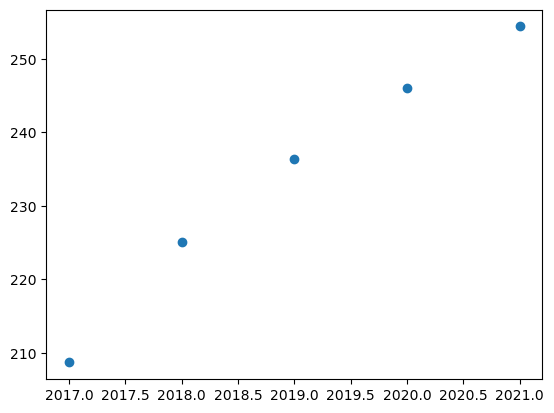

In [89]:
x = [2017, 2018, 2019, 2020, 2021]
y = [avg_2017, avg_2018, avg_2019, avg_2020, avg_2021]
plt.scatter(x, y)